### imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/raw_data/train.csv')
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/raw_data/sample_submission.csv')
sample_submission=sample_submission_raw.copy()

### preprocessing

In [2]:
df['일시']=pd.to_datetime(df['일시'],format="%Y%m%d")
df.set_index('일시',inplace=True)

df['일'] = df.index.day
df['월'] = df.index.month
df['년'] = df.index.year

df['요일']=df.index.day_of_week
df['주말평일'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

# --

sample_submission['일시']=pd.to_datetime(sample_submission['일시'],format="%Y%m%d")
sample_submission.set_index('일시',inplace=True)

sample_submission['일'] = sample_submission.index.day
sample_submission['월'] = sample_submission.index.month
sample_submission['년'] = sample_submission.index.year

sample_submission['요일']=sample_submission.index.day_of_week
sample_submission['주말평일'] = sample_submission['요일'].apply(lambda x: '평일' if x < 5 else '주말')

In [3]:
from pytimekr import pytimekr
def get_holiday(_year):
    holidays=[]
    for holiday in pytimekr.holidays(year=_year):
        if pytimekr.red_days(holiday) != None:
            ans = [i.strftime("%Y-%m-%d") for i in pytimekr.red_days(holiday)]
            holidays.extend(ans)
        else:
            ans=holiday.strftime("%Y-%m-%d")
            holidays.append(ans)
    return list(set(holidays))

In [4]:
df.loc[get_holiday(2018),'주말평일'] = '주말'
df.loc[get_holiday(2019),'주말평일'] = '주말'
df.loc[get_holiday(2020),'주말평일'] = '주말'
df.loc[get_holiday(2021),'주말평일'] = '주말'
sample_submission.loc[sorted(get_holiday(2022))[:-1],'주말평일'] ='주말'

In [5]:
df_2018_raw = df[df.index.year == 2018]
df_2019_raw = df[df.index.year == 2019]
df_2020_raw = df[df.index.year == 2020]
df_2021_raw = df[df.index.year == 2021]

In [6]:
# 2
import numpy as np 

train_data = df.copy()
test_data_2 = sample_submission.copy()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for col in df_2018.columns[:4]:
    df_2018[col][15:] = smooth(df_2018[col],10)[15:]
for col in df_2019.columns[:4]:
    df_2019[col][15:] = smooth(df_2019[col],10)[15:]
for col in df_2020.columns[:4]:
    df_2020[col][15:] = smooth(df_2020[col],10)[15:]
for col in df_2021.columns[:4]:
    df_2021[col][15:] = smooth(df_2021[col],10)[15:]

train_data=pd.concat([df_2018,df_2019,df_2020,df_2021])

### data spilt

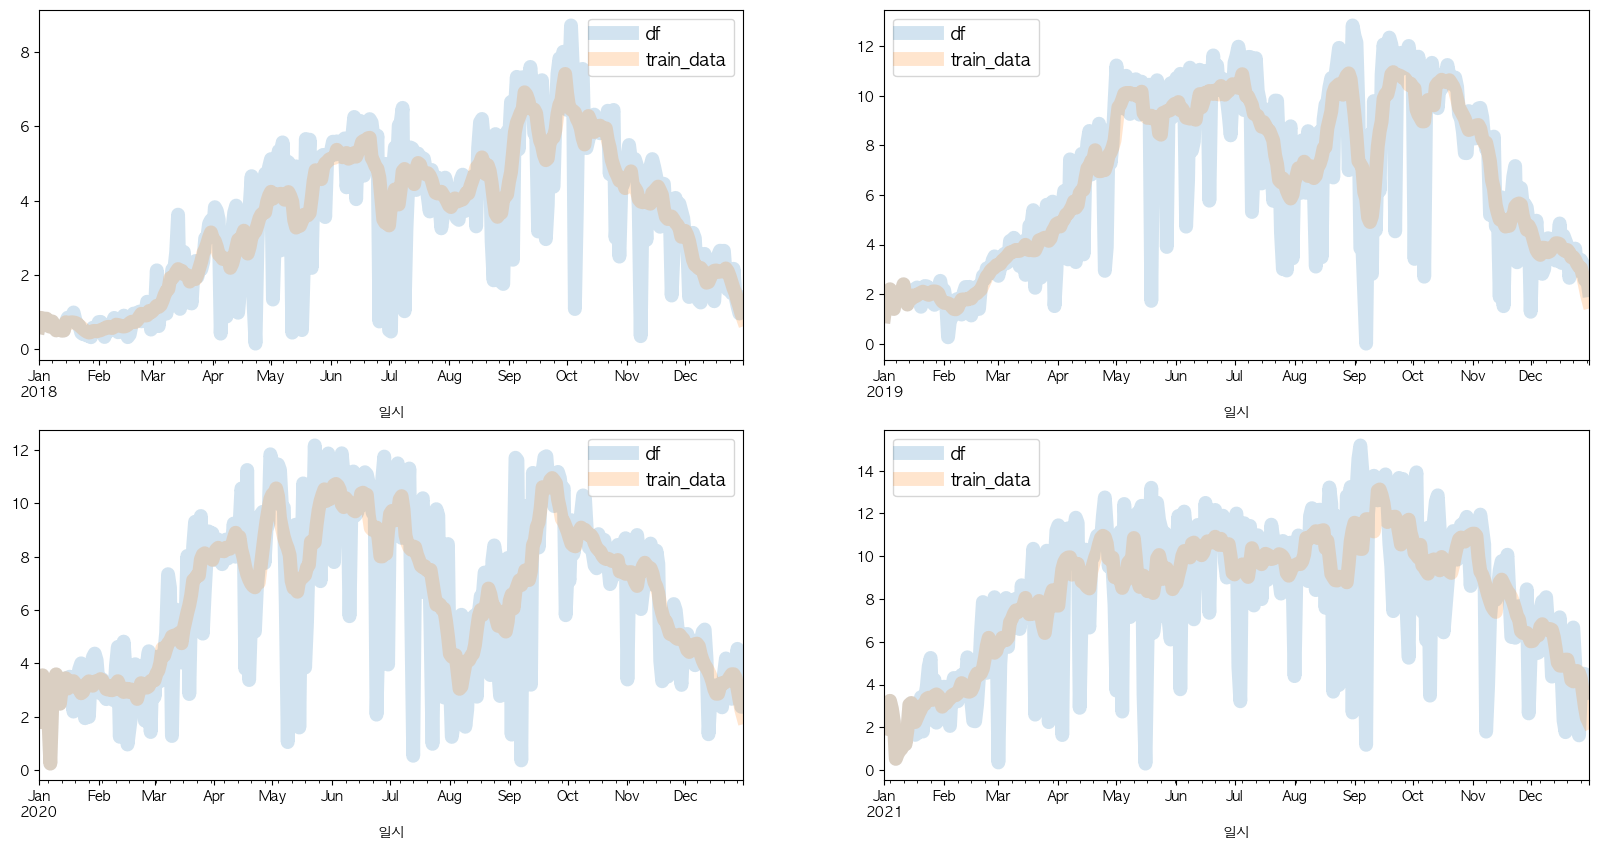

In [7]:
plt.subplot(2,2,1)
df[df['년']==2018].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2018].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
df[df['년']==2019].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2019].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
df[df['년']==2020].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2020].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
df[df['년']==2021].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2021].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_2018.iloc[:,:4]=mms.fit_transform(df_2018.iloc[:,:4])
df_2019.iloc[:,:4]=mms.fit_transform(df_2019.iloc[:,:4])
df_2020.iloc[:,:4]=mms.fit_transform(df_2020.iloc[:,:4])
df_2021.iloc[:,:4]=mms.fit_transform(df_2021.iloc[:,:4])

In [9]:
# data for yearly movement
df_yearly_movement=pd.concat([df_2018,df_2019,df_2020,df_2021]).drop(['년'],axis=1)

In [26]:
## 

In [31]:
# 2
import numpy as np 

train_data = df.copy()
test_data_2 = sample_submission.copy()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for col in df_2018.columns[:4]:
    df_2018[col][15:] = smooth(df_2018[col],10)[15:]
for col in df_2019.columns[:4]:
    df_2019[col][15:] = smooth(df_2019[col],10)[15:]
for col in df_2020.columns[:4]:
    df_2020[col][15:] = smooth(df_2020[col],10)[15:]
for col in df_2021.columns[:4]:
    df_2021[col][15:] = smooth(df_2021[col],10)[15:]

df_2020.drop('2020-02-29',inplace=True)

train_data=pd.concat([df_2018,df_2019,df_2020,df_2021])

In [32]:
train_data['월_일'] = train_data['월'].apply(lambda x: str(x)+'_')+train_data['일'].apply(lambda x: str(x))

In [33]:
"""diff_df = list()
for i in train_data['월_일'].unique():
    temp=train_data[train_data['월_일'] == i].iloc[:,:4].diff().fillna(1)
    diff_mean=pd.DataFrame((temp.iloc[0,:]*1 + temp.iloc[1,:]*2 + temp.iloc[2,:]*3 + temp.iloc[2,:]*4)/10,
                           columns=[str(temp.index[0]).split('-')[1] +'_'+ str(temp.index[0]).split('-')[-1].split()[0]])
    diff_df.append(diff_mean)"""

"diff_df = list()\nfor i in train_data['월_일'].unique():\n    temp=train_data[train_data['월_일'] == i].iloc[:,:4].diff().fillna(1)\n    diff_mean=pd.DataFrame((temp.iloc[0,:]*1 + temp.iloc[1,:]*2 + temp.iloc[2,:]*3 + temp.iloc[2,:]*4)/10,\n                           columns=[str(temp.index[0]).split('-')[1] +'_'+ str(temp.index[0]).split('-')[-1].split()[0]])\n    diff_df.append(diff_mean)"

In [34]:
diff_df = list()
for i in train_data['월_일'].unique():
    temp=train_data[train_data['월_일'] == i].iloc[:,:4].diff()
    diff_mean=pd.DataFrame((temp.iloc[1,:]*1 + temp.iloc[2,:]*1 + temp.iloc[3,:]*1)/3,
                           columns=[str(temp.index[0]).split('-')[1] +'_'+ str(temp.index[0]).split('-')[-1].split()[0]])
    diff_df.append(diff_mean)

In [35]:
# diff ratio
diff_df=pd.concat(diff_df,axis=1)

In [36]:
df_yearly_movement_pps=pd.concat([df_yearly_movement[~(df_yearly_movement['월']==12)].drop(['월','요일'],axis=1),
                      pd.get_dummies(df_yearly_movement[~(df_yearly_movement['월']==12)]['월']),
                      pd.get_dummies(df_yearly_movement[~(df_yearly_movement['월']==12)]['요일'])],axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df_yearly_movement_pps['주말평일'] = lbe.fit_transform(df_yearly_movement_pps['주말평일'])

In [38]:
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.kernel_ridge import KernelRidge

kernel_ridge=KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gradient_boosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='auto',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='absolute_error', random_state =5)

vot_model = VotingRegressor(
    [('m1',kernel_ridge),
     ('m2',gradient_boosting)]    
)


In [30]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=3)
for i in range(4):
    print(f"{df_yearly_movement_pps.columns[i]}")
    for model in [kernel_ridge, gradient_boosting,vot_model]:
        result=cross_val_score(model,df_yearly_movement_pps.iloc[:,4:],df_yearly_movement_pps.iloc[:,i],scoring='neg_mean_absolute_error')
        print(str(model).split('(')[0])
        print(np.mean(result)*-1)
    print('--'*10)

광진구
KernelRidge
0.12772918038411146
GradientBoostingRegressor
0.14438897159968023
VotingRegressor
0.13469987550440793
--------------------
동대문구
KernelRidge
0.10053733408243073
GradientBoostingRegressor
0.1133761300166706
VotingRegressor
0.10520742666324386
--------------------
성동구
KernelRidge
0.11583433740551637
GradientBoostingRegressor
0.13094047880127482
VotingRegressor
0.12227096895594151
--------------------
중랑구
KernelRidge
0.10476699565754448
GradientBoostingRegressor
0.11583530811873446
VotingRegressor
0.10898326812669228
--------------------


In [39]:
sample_submission.drop('년',axis=1,inplace=True)

KeyError: "['년'] not found in axis"

In [ ]:
sample_submission_pps=pd.concat([sample_submission.drop(['월','요일'],axis=1),
                      pd.get_dummies(sample_submission['월']),
                      pd.get_dummies(sample_submission['요일'])],axis=1)
sample_submission_pps['주말평일'] = lbe.transform(sample_submission_pps['주말평일'])

In [ ]:
kernel_ridge1=KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernel_ridge2=KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernel_ridge3=KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernel_ridge4=KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


kernel_ridge1.fit(df_yearly_movement_pps.iloc[:,4:],df_yearly_movement_pps.iloc[:,0])
kernel_ridge2.fit(df_yearly_movement_pps.iloc[:,4:],df_yearly_movement_pps.iloc[:,1])
kernel_ridge3.fit(df_yearly_movement_pps.iloc[:,4:],df_yearly_movement_pps.iloc[:,2])
kernel_ridge4.fit(df_yearly_movement_pps.iloc[:,4:],df_yearly_movement_pps.iloc[:,3])

KernelRidge(alpha=0.6, coef0=2.5, degree=2, kernel='polynomial')

In [ ]:
sample_submission_pps.iloc[:,0]=kernel_ridge1.predict(sample_submission_pps.iloc[:,4:])
sample_submission_pps.iloc[:,1]=kernel_ridge2.predict(sample_submission_pps.iloc[:,4:])
sample_submission_pps.iloc[:,2]=kernel_ridge3.predict(sample_submission_pps.iloc[:,4:])
sample_submission_pps.iloc[:,3]=kernel_ridge4.predict(sample_submission_pps.iloc[:,4:])

In [ ]:
sample_submission_pps.iloc[:,:4].mean(axis=0)

광진구     0.571581
동대문구    0.567036
성동구     0.575782
중랑구     0.554097
dtype: float64

In [40]:
df_2021_raw.iloc[:,:4].mean(axis=0)

광진구     8.165704
동대문구    6.660734
성동구     6.917874
중랑구     4.779370
dtype: float64

In [41]:
main_df=sample_submission_pps.iloc[:,:4]

In [42]:
main_df['월'] = main_df.index.month
main_df['일'] = main_df.index.day

In [43]:
main_df['월_일']=main_df.reset_index()['일시'].apply(lambda x: str(x).split('-')[1]+'_'+str(x).split('-')[-1].split()[0]).values

In [44]:
main_df.iloc[:,0] = main_df.iloc[:,0] * (df_2021_raw.iloc[:,0].mean()/main_df.iloc[:,0].mean())
main_df.iloc[:,1] = main_df.iloc[:,1] * (df_2021_raw.iloc[:,1].mean()/main_df.iloc[:,1].mean())
main_df.iloc[:,2] = main_df.iloc[:,2] * (df_2021_raw.iloc[:,2].mean()/main_df.iloc[:,2].mean())
main_df.iloc[:,3] = main_df.iloc[:,3] * (df_2021_raw.iloc[:,3].mean()/main_df.iloc[:,3].mean())

In [45]:
ans_sheet = list()
for col in diff_df.columns:
    ans_sheet.append(main_df[main_df['월_일']==col].iloc[:,:4] + diff_df[col])

In [46]:
my_ans=pd.concat(ans_sheet)

In [47]:
my_ans.index= sample_submission_raw['일시']

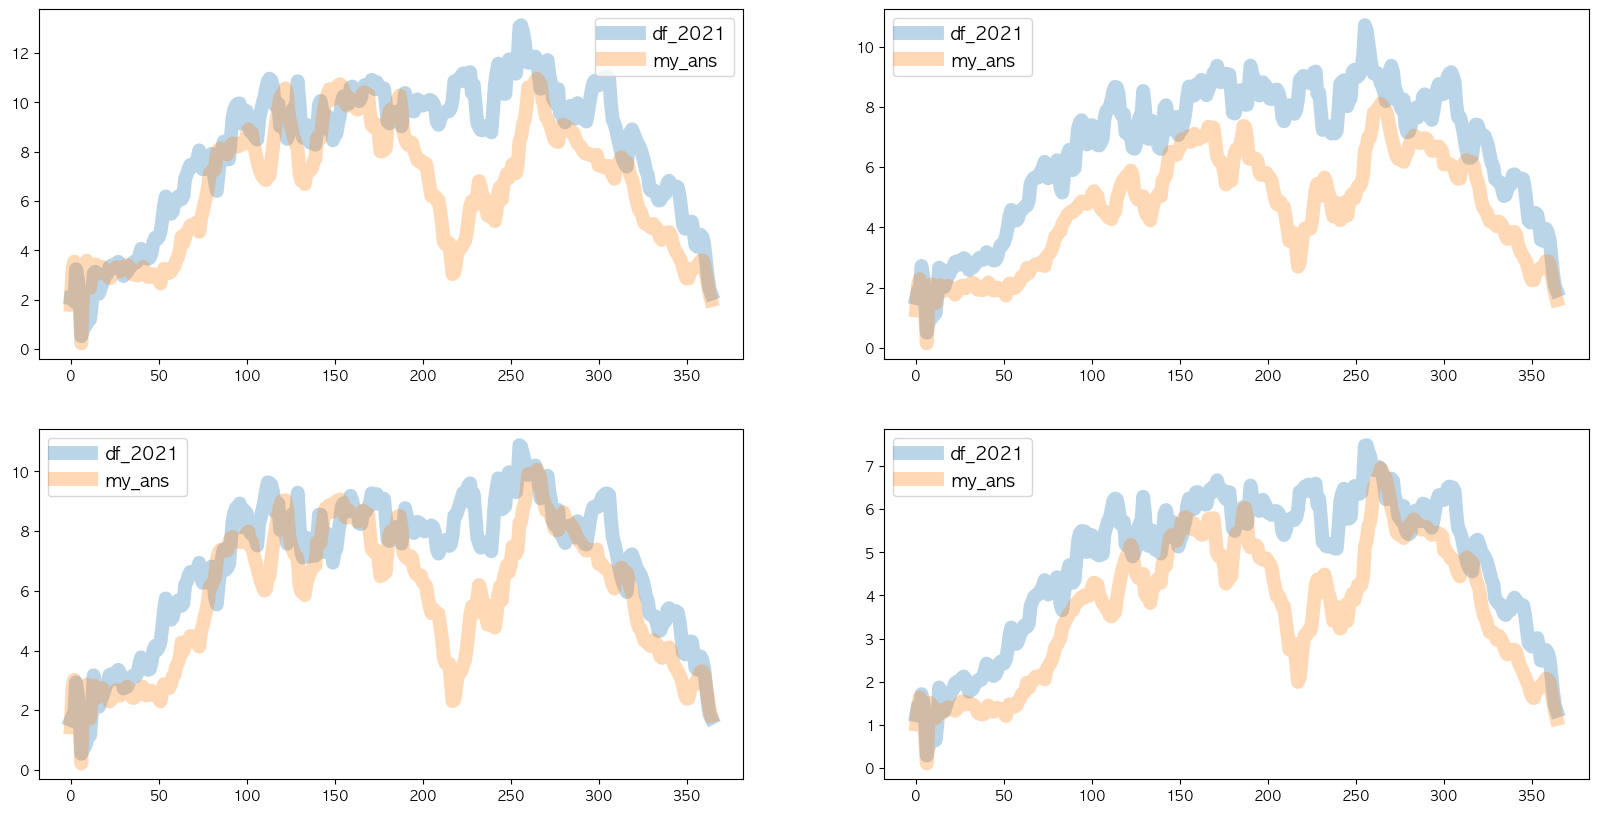

In [60]:
my_ans=my_ans.round(3)
plt.subplot(2,2,1)
df_2021.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_2021')
df_2020.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='my_ans')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
df_2021.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_2021')
df_2020.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='my_ans')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
df_2021.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_2021')
df_2020.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='my_ans')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
df_2021.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_2021')
df_2020.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='my_ans')
plt.legend(fontsize=13)
plt.show()

In [59]:
my_ans.to_csv('_new_idea_mean_same_rates.csv')

<AxesSubplot: >

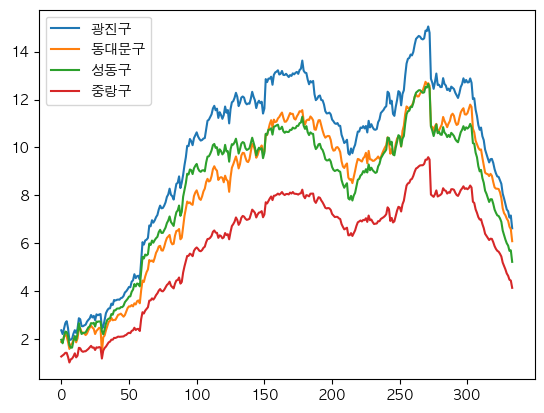

In [49]:
my_ans.reset_index(drop=True).plot()

In [88]:
temp=my_ans.copy()

In [89]:
temp.iloc[:,:]=temp.iloc[:,:]*1.05

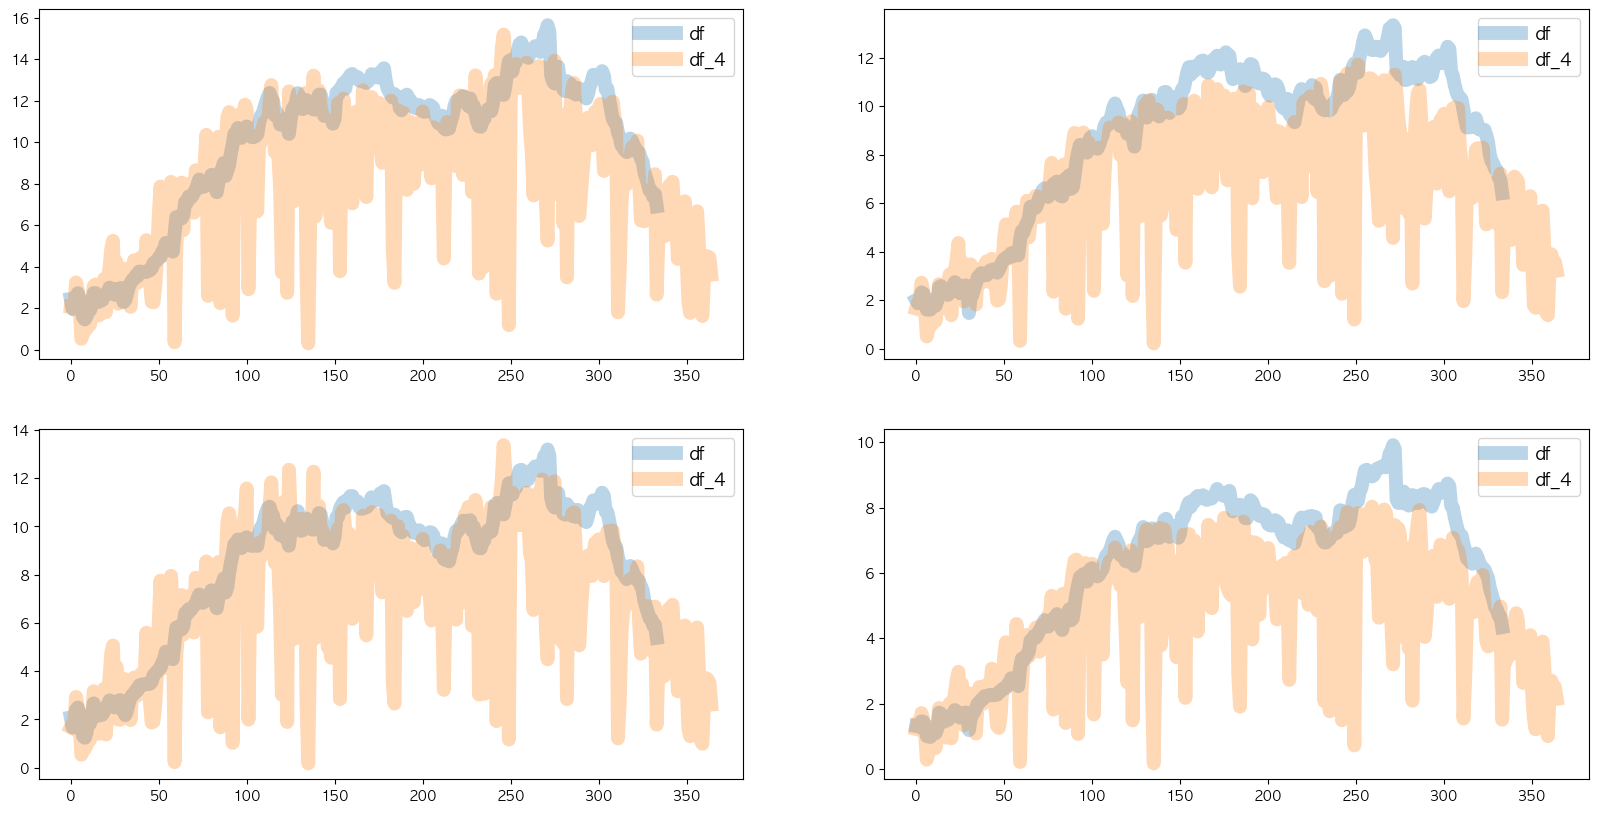

In [95]:
plt.subplot(2,2,1)
temp.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
temp.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
temp.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
temp.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.show()

In [102]:
temp=my_ans.copy()

In [103]:
for col in temp.columns:
    temp[col][10:-10] = smooth(temp[col],10)[10:-10]

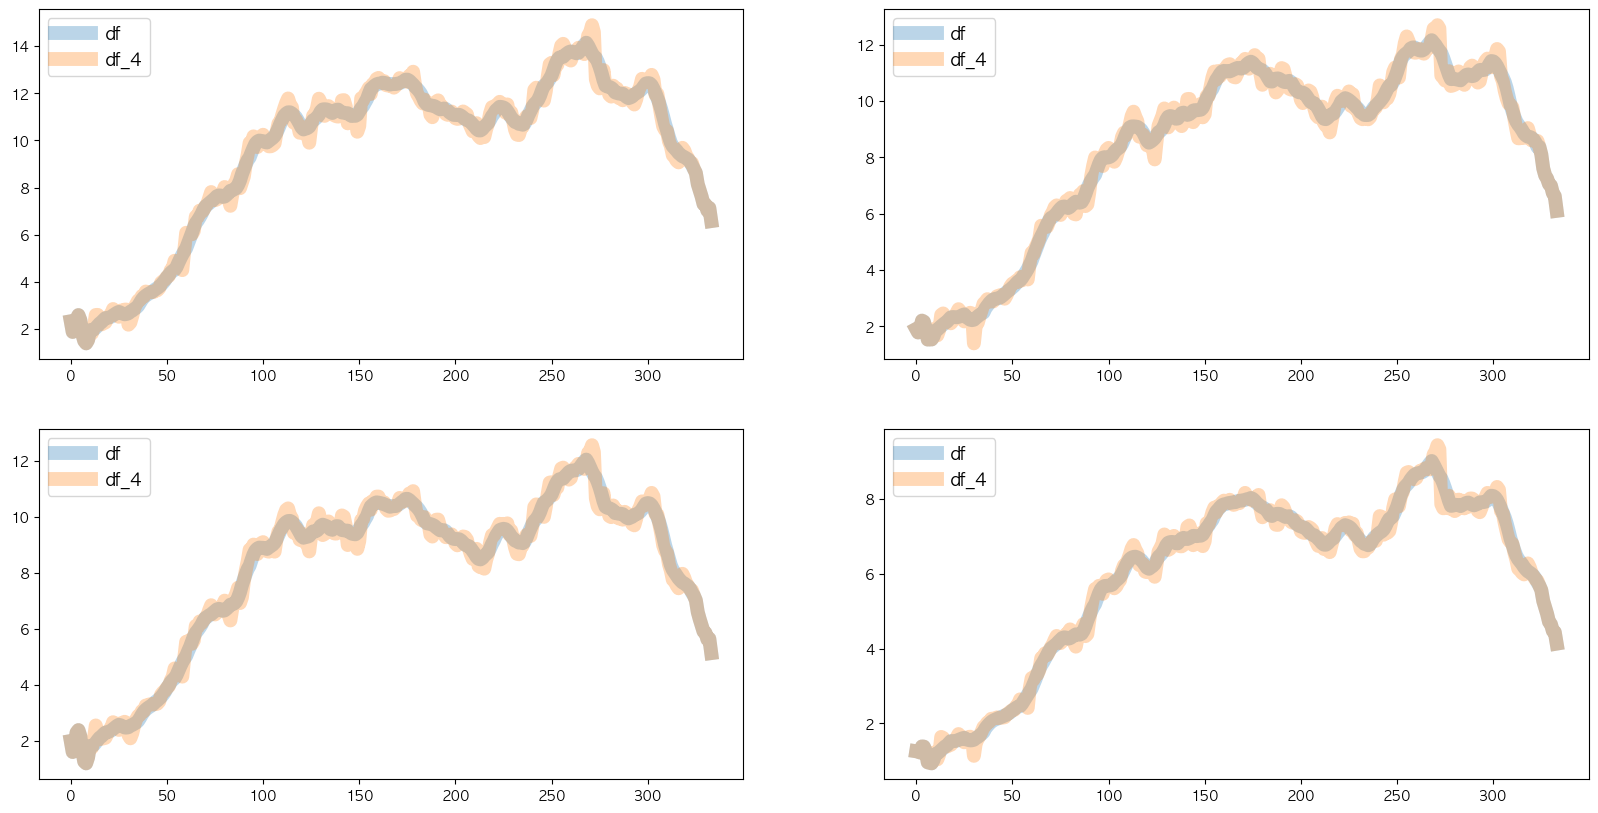

In [106]:
plt.subplot(2,2,1)
temp.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
my_ans.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
temp.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
my_ans.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
temp.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
my_ans.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
temp.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
my_ans.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.show()

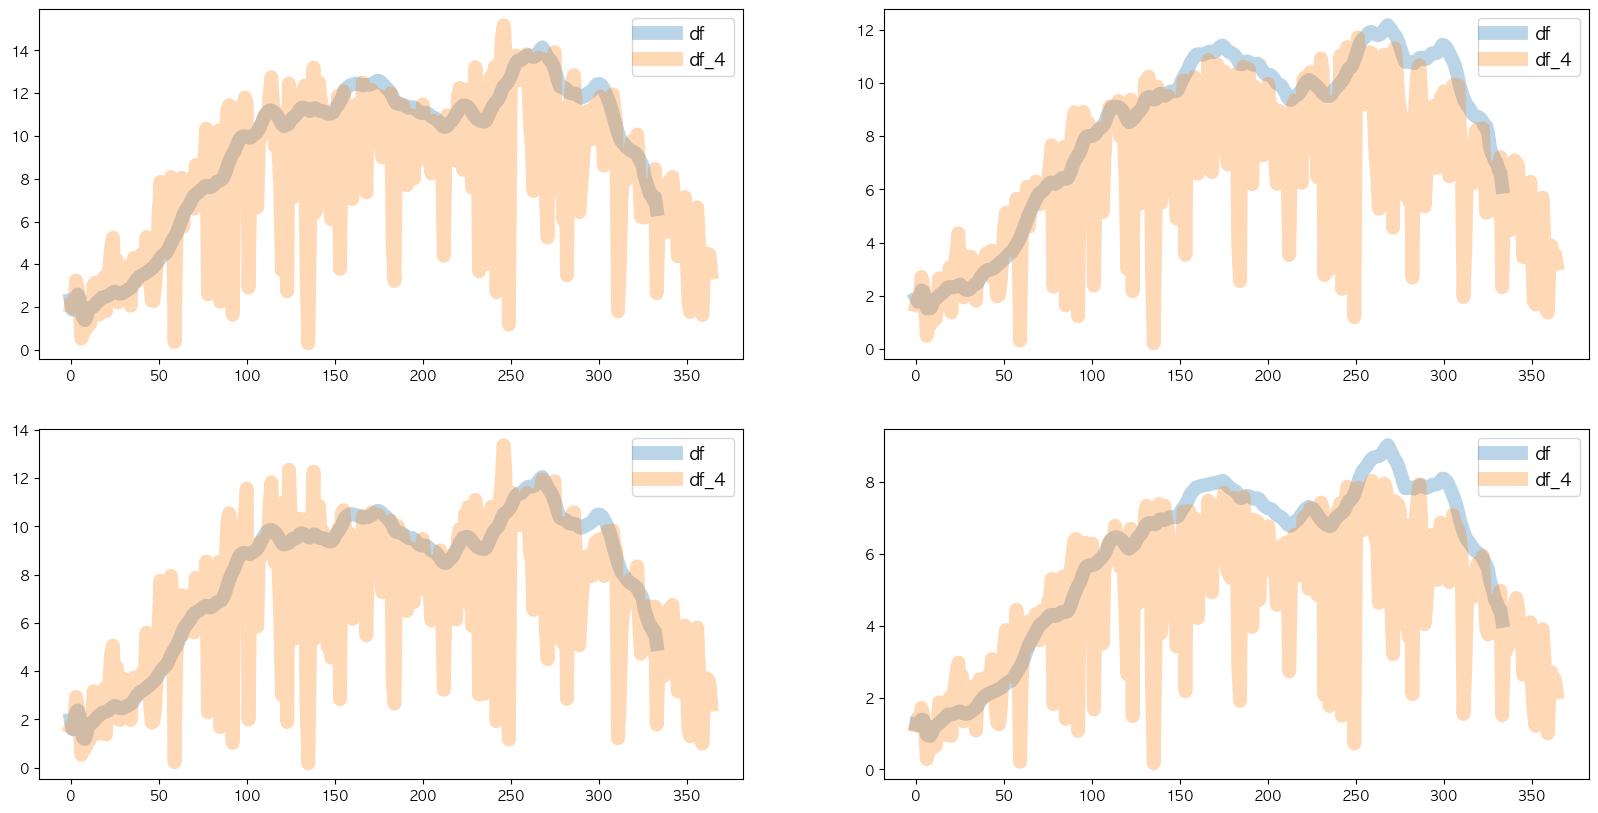

In [110]:
plt.subplot(2,2,1)
temp.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,0].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
temp.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,1].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
temp.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,2].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
temp.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df')
df_2021_raw.reset_index(drop=True).iloc[:,3].plot(figsize=(20,10),alpha=0.3,lw=10,label='df_4')
plt.legend(fontsize=13)
plt.show()

In [114]:
temp=(temp * 1.05).round(3)

In [116]:
temp.to_csv('_new_idea_2.csv')